# Introduction to Qiskit

This Jupyter Notebook hopes to introduce basic Qiskit to supplement the lectures on quantum information that have been presented thus far.

Before going through this notebook, it's necessary to install qiskit and all of its prerequisites

- qiskit
- qiskit[visualization]
- qiskit-aer
- numpy
- matplotlib
- pylatexenc

Please run the next cell to import all of the necessary functions for this lesson:

In [54]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.result import marginal_distribution
from qiskit.circuit.library import UGate
from qiskit.primitives import Sampler
from qiskit.quantum_info import Statevector, Operator
from numpy import pi, random, array, matmul, sqrt
from random import randint

## Single Systems

### Vectors and Matrices in Python

Since Qiskit uses the Python programming language, it is useful to discuss matrix and vector computations in Python. In Python, matrix and vector computations can be performed using the **array** class from the **NumPy** library.

Here is an example of a code cell that defines two vectors **ket0** and **ket1** and displays their average.

We can also use **array** to create matrices that represent operations

Matrix multiplication can be performed using the **matmul** function from **NumPy**:

### States, Measurements, and Operations

Qiskit includes several classes that allow for states, measurements, and operations to be easily created and manipulated.

**Defining and displaying state vectors**

Qiskit's **Statevector** class provides functionality for defining and manipulating quantum state vectors (notice that complex numbers in Python take the form of a + b**j**):

The **Statevector** class provides a **draw** method for displaying state vectors, including **latex** and **text** options for different visualizations:

The **Statevector** class also includes the **is_valid** method, which checks to see if a given vector is a valid quantum state vecotr (i.e., that it has Euclidean norm equal to 1):

**Simulating measurements using Statevector**

Next we will see one way that measurements of quantum states can be simulated in Qiskit, using the **measure** method from the **Statevector** class.

First, we create a qubit state vector v and then display it.

Next, running the **measure** method simulates a standard basis measurement. It returns the result of that measurement, plus the new quantum state of our system after that measurement.

Measurement outcomes are probabilistic, so the same method can return different results. Try running the cell a few times to see this.

As an aside, **Statevector** will throw an error if the **measure** method is applied to an invalid quantum state vector.

**Statevector** also comes with a **sample_counts** method that allows for the simulation of any number of measurements on the system. For example, the following cell shows the outcome of measuring the vector **v** 1000 times. The cell also demonstrates the **plot_histogram** function for visualizing the results.

**Performing operations with Operator and Statevector**

Unitary operations can be defined and performed on state vectors in Qiskit using the **Operator** class, as in the example that follows:

**Looking ahead toward quantum circuits**

We won't talk about quantum circuits until later this lesson, but we can experiment with circuits that have only one qubit that consists of numerous unitary operations:

The operations are applied sequentially, starting on the left and ending on right in the figure. Let us first initialize a starting quantum state vector and then evolve that state according to the sequence of operations.

Finally, let's simulate the result of running this experiment 4000 times:

## Multiple Systems

### Tensor Products

The **Statevector** class has a **tensor** method which returns the tensor product of itself and another **Statevector**.

For example, below we create two state vectors representing ket 0 and ket 1, and use the **tensor** method to create a new vector (ket 0 tensor ket 1):

In another example below, we create state vectors representing the plus and i states, and combine them to create a enw state vector. We'll assign this new vector to the variable **psi**:

The **Operator** class also has a **tensor** method. In the example below, we create the **X** and **I** gates and display their tensor product.

We can then treat these compound states and operations as we did single systems in the previous lesson (the **^** opreator tensors matrices together).

Below, we create a **CX** operator and apply it to **psi**:

### Partial Measurements

The **measure** method returns two items: the simulated measurement result, and the new Statevector given this measurement.

By default, **measure** measures all qubits in the state vector, but we can provide a list of integers to only measure the qubits at those indices. To demonstrate, the cell creates a 3-qubit system.

(Note that Qiskit is primarily designed for use with qubit-based quantum computers. As such, Statevector will try to interpret any vector with 2^n elements as a system of n qubits.)

The cell below simulates a measurement on the rightmost qubit (which has index 0). The other two qubits are not measured.

## Quantum Circuits

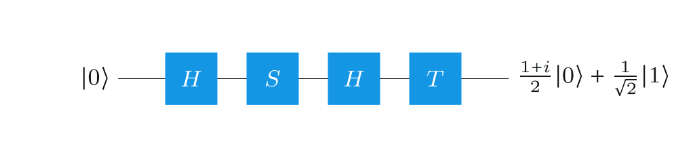

To begin, let's try recreating this circuit in qiskit. To start, we need to sequentially add gates from left to right.

The default names for qubits in Qiskit are q0, q1, q2, etc., and when there is just a single qubit like in our example, the default name is q rather q0. If we wish to choose our own name we can do this using the **QuantumRegister** class like this:

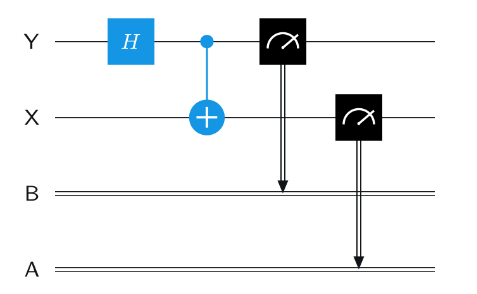

Let's try recreating this circuit using Qiskit:

The circuit can be simulated using the **Sampler** primitive.

## Entanglement in Action

### Quantum Teleportation

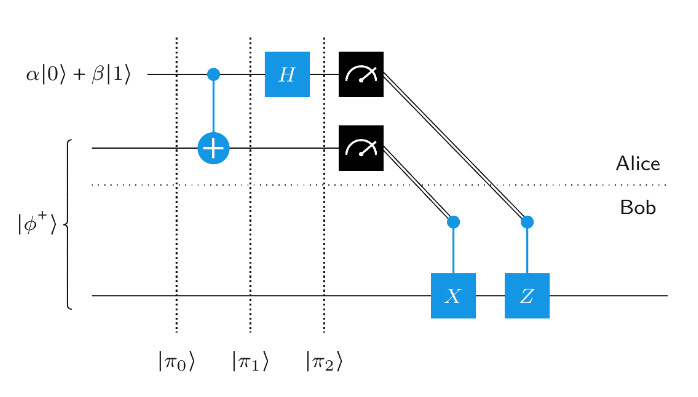

Let's try implementing the teleportation protocol in Qiskit.

The **barrier** function creates a visual separation making the circuit diagram more readable, and it also prevents Qiskit from performing various simplifications and optimizations across barriers during compilation when circuits run on real hardware. The **if_test** function applies an opeartion conditionally depending on the classical bit or register.

The circuit first initializes (A,B) to be in the phi plus state, followed by Alice's operations, then her measurements, and finally Bob's operations.

To test that the protocol works correctly, we'll apply a randomly generated single-qubit gate to the initialized ket 0 state of Q to obtain a random quanstum state vector to be teleported. By applying the inverse of that gate to B after the protocol is run, we can verify that the state was teleported by measuring to see that it has returned the ket 0 state.

First, we'll randomly choose a unitary qubit gate:

The UGate function creates a unitary matrix using theta, phi, and lambda as follows:
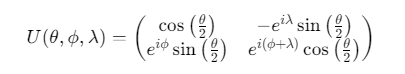

Now, we'll create a new testing circuit that first applies our random gate to Q, then runs the teleportation circuit, and finally applies the inverse of our random gate to the qubit B and measures. The outcome should be 0 with certainty.

Finally let's run the Aer simulator on this circuit and plot a histogram of the outputs. We'll see the statistics for all three classical bits: the bottom/leftmost bit should always be 0,indicating that the qubit Q was successfully teleported into B, while the other two bits should be roughly uniform.

We can also filter the statistics to focus just on the test result qubit if we wish, like this:

### Superdense Coding
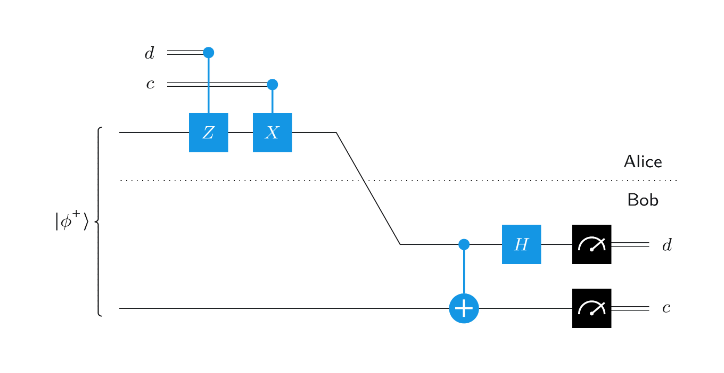

To start implementing the Superdense coding protocol, let's first specify the bits to be transmitted.

Now, we'll build the circuit accordingly. Here we'll just allow Qiskit to use the default names for the qubits: q0 for the top qubit and q1 for the bottom one.

The **measure_all** function measures all of the qubits and puts the results into a single classical register (that has 2 classical bits).

Running the Aer simualator produces the expected output.

Just for fun, we can use an additional qubit as a random bit generator to randomly chooes c and d, then run the superdense coding protocol to see that these bits are transmitted correctly.

In [ ]:
# Initialize the ebit
test.h(ebit0)
test.cx(ebit0, ebit1)
test.barrier()

# Now the protocol runs, starting with Alice's actions, which depend
# on her bits.
with test.if_test((Alice_d, 1), label="Z"):
    test.z(ebit0)
with test.if_test((Alice_c, 1), label="X"):
    test.x(ebit0)
test.barrier()

# Bob's actions
test.cx(ebit0, ebit1)
test.h(ebit0)
test.barrier()

Bob_c = ClassicalRegister(1, "Bob c")
Bob_d = ClassicalRegister(1, "Bob d")
test.add_register(Bob_d)
test.add_register(Bob_c)
test.measure(ebit0, Bob_d)
test.measure(ebit1, Bob_c)

display(test.draw())

Running the Aer simualtor shows the results: Alice and Bob's classical bits always agree.

### The CHSH Game

**The Game:**
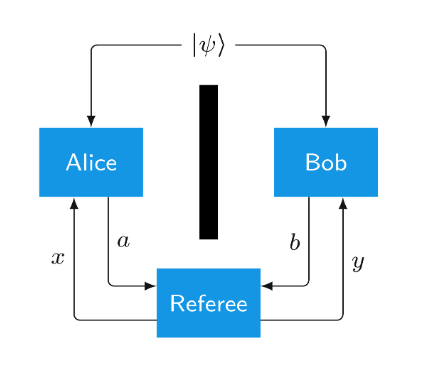

**The Strategy:**
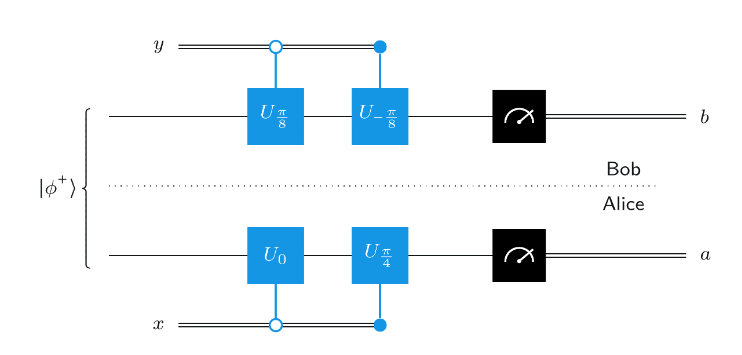

First, we'll provide a definition of the game itself, which allows an arbitrary strategy to be plugged in as an argument.

In [49]:
def chsh_game(strategy):
    """Plays the CHSH game
    Args:
        strategy (callable): A function that takes two bits (as `int`s) and
            returns two bits (also as `int`s). The strategy must follow the
            rules of the CHSH game.
    Returns:
        int: 1 for a win, 0 for a loss.
    """
    # Referee chooses x and y randomly
    x, y = randint(0, 2), randint(0, 2)

    # Use strategy to choose a and b
    a, b = strategy(x, y)

    # Referee decides if Alice and Bob win or lose
    if (a != b) == (x & y):
        return 1  # Win
    return 0  # Lose

Now, we'll create a function that outputs a circuit depending on the questions for Alice and Bob. We'll let the qubits have their default names for simplicity, and we'll use the built-in Ry(theta) gate for Alice and Bob's actions.

Here are the four possible circuits depending on which questions are asked.

In [3]:
# Draw the four possible circuits

print("(x,y) = (0,0)")
display(chsh_circuit(0, 0).draw())

print("(x,y) = (0,1)")
display(chsh_circuit(0, 1).draw())

print("(x,y) = (1,0)")
display(chsh_circuit(1, 0).draw())

print("(x,y) = (1,1)")
display(chsh_circuit(1, 1).draw())

Now, we'll create a job using the Aer simulator that runs the circuit a single time for a given pair (x,y).

In [52]:
sampler = Sampler()


def quantum_strategy(x, y):
    """Carry out the best strategy for the CHSH game.
    Args:
        x (int): Alice's bit (must be 0 or 1)
        y (int): Bob's bit (must be 0 or 1)
    Returns:
        (int, int): Alice and Bob's answer bits (respectively)
    """
    

Finally, we'll play the game 1,000 times and compute the fraction of them that the strategy wins.

In [59]:
NUM_GAMES = 1000
TOTAL_SCORE = 0

for _ in range(NUM_GAMES):
    TOTAL_SCORE += chsh_game(quantum_strategy)

print("Fraction of games won:", TOTAL_SCORE / NUM_GAMES)

Fraction of games won: 0.584


We can also define a classical strategy and see how well it works.

In [66]:
def classical_strategy(x, y):
    """An optimal classical strategy for the CHSH game
    Args:
        x (int): Alice's bit (must be 0 or 1)
        y (int): Bob's bit (must be 0 or 1)
    Returns:
        (int, int): Alice and Bob's answer bits (respectively)
    """
    

Again, let's play the game 1,000 times to see how well it works.

In [67]:
NUM_GAMES = 1000
TOTAL_SCORE = 0

for _ in range(NUM_GAMES):
    TOTAL_SCORE += chsh_game(classical_strategy)

print("Fraction of games won:", TOTAL_SCORE / NUM_GAMES)

Fraction of games won: 0.555
